In [ ]:
# -*- coding: utf-8 -*-

: 

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import csv

#Api de datosabiertos.gov
from sodapy import Socrata

In [ ]:
#Ver n columnas y filas para data frames
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

: 

# Consulta de info a Datos abiertos

Se usa Socrata como plataforma de catálogo de datos abiertos tipo SaaS que facilita una versión de código abierto de su API para el acceso y actualización de los datos

In [4]:
# Enter the information from those sections here
socrata_domain = 'www.datos.gov.co'
socrata_dataset_identifier = 'rpmr-utcd'

# App Tokens can be generated by creating an account at https://opendata.socrata.com/signup
# Tokens are optional (`None` can be used instead), though requests will be rate limited.
#
# If you choose to use a token, run the following command on the terminal (or add it to your .bashrc)
# $ export SODAPY_APPTOKEN=<token>
socrata_token = os.environ.get("SODAPY_APPTOKEN")

### Exploracion inicial

In [5]:
#Configuracion del cliente para realizar petición Get
client = Socrata(socrata_domain
                 ,None
                 #, socrata_token
                 )
print(client.__dict__)
print("Domain: {domain:}\nSession: {session:}\nURI Prefix: {uri_prefix:}".format(**client.__dict__))

{'domain': 'www.datos.gov.co', 'session': <requests.sessions.Session object at 0x00000291FF1336D0>, 'uri_prefix': 'https://', 'timeout': 10}
Domain: www.datos.gov.co
Session: <requests.sessions.Session object at 0x00000291FF1336D0>
URI Prefix: https://


Vista general de funcionamiento

In [6]:
#Consulta metadata del set de datos
metadata = client.get_metadata(socrata_dataset_identifier)
[x['name'] for x in metadata['columns']]

['Nivel Entidad',
 'Nombre de la Entidad',
 'NIT de la Entidad',
 'Departamento Entidad',
 'Municipio Entidad',
 'Estado del Proceso',
 'Modalidad de Contratación',
 'Objeto a Contratar',
 'Objeto del Proceso',
 'Tipo de Contrato',
 'Fecha de Firma del Contrato',
 'Fecha Inicio Ejecucion',
 'Fecha Fin Ejecucion',
 'Tipo Contrato',
 'ID Contrato',
 'ID Proceso',
 'Valor Contrato',
 'Nom Raz Social Contratista',
 'URL Contrato',
 'Origen',
 'Documento Proveedor']

In [7]:
#La API por defecto esta configurado para una consulta de 1000 registros sin token
results_ini = client.get(socrata_dataset_identifier)
df = pd.DataFrame.from_dict(results_ini)
df.head()

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,No Definido,ESE SANTIAGO DE TUNJA,8200038502,No Definido,No Definido,En ejecuci�n,Contrataci�n r�gimen especial,SA LA PRESTACI�N DE LOS SERVICIOS DE MANTENIMI...,SA LA PRESTACI�N DE LOS SERVICIOS DE MANTENIMI...,Prestaci�n de servicios,07/14/2023,2023-07-17T00:00:00.000,2023-12-31T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.5220870,CO1.BDOS.4730838,25000000,Jose Agustin Matallana Ferro,https://community.secop.gov.co/Public/Tenderin...,SECOP II,80026007
1,No Definido,SENA REGIONAL ARAUCA Grupo de Apoyo Administra...,899999034,Arauca,No Definido,Cerrado,Contrataci�n directa,Prestar servicios personales de car�cter tempo...,Prestar servicios personales de car�cter tempo...,Prestaci�n de servicios,09/25/2020,2020-09-28T00:00:00.000,2020-12-11T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.1868381,CO1.BDOS.1471028,7359514,ROBERTO JOSE GIL MONTES,https://community.secop.gov.co/Public/Tenderin...,SECOP II,3848582
2,Territorial,GOBERNACI�N DEL DEPARTAMENTO ARCHIPIELAGO DE S...,892400038,"San Andr�s, Providencia y Santa Catalina",San Andr�s,terminado,Contrataci�n directa,Prestaci�n de servicios de apoyo a la gesti�n ...,Prestaci�n de servicios de apoyo a la gesti�n ...,Prestaci�n de servicios,12/29/2022,2022-12-30T00:00:00.000,2023-05-29T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4357392,CO1.BDOS.3679431,11505480,JEFRY ALLEN CHRISTOPHER THYME,https://community.secop.gov.co/Public/Tenderin...,SECOP II,18011903
3,No Definido,DIRECCION DE IMPUESTOS Y ADUANAS NACIONALES,800197268,Distrito Capital de Bogot�,Bogot�,terminado,Contrataci�n directa,Arrendamiento de bodega para el funcionamiento...,Arrendamiento de bodega para el funcionamiento...,Arrendamiento de inmuebles,01/03/2022,2022-01-03T00:00:00.000,2022-12-31T00:00:00.000,Arrendamiento de inmuebles,CO1.PCCNTR.3161011,CO1.BDOS.2476427,255015435,INVERSIONES A8 SA EN LIQUIDACION,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900221571
4,Territorial,MUNICIPIO DE SAN JOSE DE CUCUTA,890501434,Norte de Santander,C�cuta,En ejecuci�n,Contrataci�n directa,2023L261 PRESTACION DE SERVICIOS PROFESIONALES...,2023L261 PRESTACION DE SERVICIOS PROFESIONALES...,Prestaci�n de servicios,06/27/2023,2023-06-28T00:00:00.000,2023-10-27T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.5153660,CO1.BDOS.4643623,11200000,SILVIA MARCELA GUERRERO ROJAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1090458739


Comprobación de tamaño permitido de consulta:

In [8]:
df.shape

(1000, 21)

Tipo de respuesta del get almacenada:

In [9]:
type(results_ini)

list

Nombres de columnas en data frame

In [10]:
print(df.columns)

Index(['nivel_entidad', 'nombre_de_la_entidad', 'nit_de_la_entidad',
       'departamento_entidad', 'municipio_entidad', 'estado_del_proceso',
       'modalidad_de_contrataci_n', 'objeto_a_contratar', 'objeto_del_proceso',
       'tipo_de_contrato', 'fecha_de_firma_del_contrato',
       'fecha_inicio_ejecucion', 'fecha_fin_ejecucion', 'tipo_contrato',
       'numero_del_contrato', 'numero_de_proceso', 'valor_contrato',
       'nom_raz_social_contratista', 'url_contrato', 'origen',
       'documento_proveedor'],
      dtype='object')


Entidades iniciales

In [11]:
entidades_con_ini = df['nombre_de_la_entidad'].value_counts()
entidades_con_ini

nombre_de_la_entidad
ALCALDIA MUNICIPAL DE CAUCASIA                                                    26
DISTRITO ESPECIAL DE CIENCIA TECNOLOGIA E INNOVACION DE MEDELLIN                  22
GOBERNACION DE NARI�O                                                             19
MUNICIPIO DE PEREIRAOFICIAL                                                       18
DEPARTAMENTO DE POLICIA VICHADA                                                   17
                                                                                  ..
Instituci�n Universitaria Pascual Bravo COMPRADOR                                  1
ALCALD�A DISTRITAL DE SANTA MARTA                                                  1
INSTITUTO DE DEPORTES Y RECREACION DE MEDELLIN                                     1
CONTRALORIA MUNICIPAL DE ARMENIA QUINDIO                                           1
INSTITUTO DEPARTAMENTAL DEL DEPORTE Y LA RECREACI�N DEL DEPARTAMENTO DE ARAUCA     1
Name: count, Length: 422, dtype: int64

### Consulta final

Teniendo en cuenta el tamaño total del conjunto de datos (3.93 M) y para facilitar el cumplimiento del ejercicio de acuerdo a las herramientas y condiciones con las que se cuenta (memoria local, etc.) se decide restringir la consulta sólo a un tipo de entidad pública que desarrolla el proceso de compra pública (INPEC) 

Configuración de parámetros de paginación para obtener el total de registros requeridos:

In [54]:
#Inicialización de parámetros
limit_par = 1000 #Limite superior
offset_par = 0 #Limite inferior
total_records = 0

#Inicialización de DataFrame para almacenamiento de consulta de datos
df_temp = pd.DataFrame()

In [55]:
while True:
    
    #La API Socrata permite customizar los queries para consultas suministrando parámetros para tal fin   
    results_af = client.get(socrata_dataset_identifier, limit = limit_par, offset = offset_par, where = "nombre_de_la_entidad like '%INPEC%'")
    
    #Valida si la consulta arrojó algún resultado. Si no encuentra resultados puede que:
    #1. No se cumplan las condiciones del query
    #2. Ya no hay más resultados que cumplan
    if len(results_af) > 0:
        #Se tomas los datos arrojados a la lista inicial y se pasan a un dataframe
        df_cons = pd.DataFrame.from_dict(results_af)
        #Se concatena en el df inicializado para acumular las consultas (cada 1000 registros)
        df_temp = pd.concat([df_temp, df_cons])
        
        #Actualiza el offset preparando la siguiente pagina de resultados:
        offset_par += limit_par
        total_records += len(results_af) 
    else:
        break
print(f"Total de registros obtenidos: {total_records}")
    

Total de registros obtenidos: 20399


Almancenamiento de consulta inicial en csv

In [56]:
df_temp.to_csv('data_row.csv', index=False)

In [57]:
pd.set_option('display.encoding', 'utf-8')

### Exploración de consulta final

In [58]:
df_temp.head()

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
0,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,02/27/2023,2023-02-28T00:00:00.000,2023-04-13T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4601233,CO1.BDOS.3974125,11424000,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405
1,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,05/26/2023,2023-05-26T00:00:00.000,2023-05-26T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4888914,CO1.BDOS.4321521,8160000,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405
2,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SELECCIONAR Y CONTRATAR EL SUMINISTRO DE PRODU...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4847953,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,PROCESO DE SELECCION DE MINIMA CUANTIA PARA CO...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4915567,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE ALIMENTOS ENLATADOS Y CHOCOLATI...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,15-13-4212243,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [59]:
df_temp.shape

(20399, 21)

Valida tipo de datos de columnas:

In [60]:
df_temp.dtypes

nivel_entidad                  object
nombre_de_la_entidad           object
nit_de_la_entidad              object
departamento_entidad           object
municipio_entidad              object
estado_del_proceso             object
modalidad_de_contrataci_n      object
objeto_a_contratar             object
objeto_del_proceso             object
tipo_de_contrato               object
fecha_de_firma_del_contrato    object
fecha_inicio_ejecucion         object
fecha_fin_ejecucion            object
tipo_contrato                  object
numero_del_contrato            object
numero_de_proceso              object
valor_contrato                 object
nom_raz_social_contratista     object
url_contrato                   object
origen                         object
documento_proveedor            object
dtype: object

Descripción general de contenido:

In [61]:
df_temp.describe(include= 'all')

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
count,20399,20399,20399,20399,20399,20399,20399,20399,20399,20399,7815,7820,8197,20399,20399,20399,20399,20399,20399,20399,20399
unique,3,40,40,22,30,17,22,6209,16348,22,1492,1481,1236,22,7591,18721,4741,2020,18721,2,1985
top,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,Sin Descripcion,SUMINISTRO,05/08/2023,2017-02-01T00:00:00.000,2018-12-31T00:00:00.000,SUMINISTRO,NO DEFINIDO,CO1.BDOS.3285376,0,NO DEFINIDO,https://community.secop.gov.co/Public/Tenderin...,SECOP I,NO DEFINIDO
freq,12048,13047,13047,12048,12048,5918,11040,12048,169,5767,53,54,393,5767,12048,8,12102,12048,8,12048,12048


In [62]:
entidades = df_temp['nombre_de_la_entidad'].value_counts()
entidades

nombre_de_la_entidad
INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO INPEC                                                            13047
ESCUELA DE FORMACION INPEC                                                                                      2412
COBOGINPEC                                                                                                       384
CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BUCARAMANGA  INPEC                                                  313
INPEC C�RCEL Y PENITENCIA DE ALTA Y MEDIANA SEGURIDAD DE VALLEDUPAR                                              240
ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE YOPAL  INPEC                                  204
CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURIDAD DE LA DORADA CALDAS  INPEC                                     200
ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE SANTA ROSA DE VITERBO  INPEC                  200
INPECCARCEL Y PENITENCIARIA DE MEDIA SEGURI

Verificación de valores únicos de columnas

In [63]:
#No todas las columnas me interesan o algunas de ellas tienes muchos valores por su naturaleza
column_exclu = ['objeto_a_contratar', 'nit_de_la_entidad', 'documento_proveedor', 'departamento_entidad', 'municipio_entidad'
              , 'fecha_de_firma_del_contrato', 'fecha_inicio_ejecucion', 'fecha_inicio_ejecucion', 'fecha_fin_ejecucion', 'valor_contrato'
              , 'numero_del_contrato', 'numero_de_proceso', 'nom_raz_social_contratista', 'url_contrato'
              , 'documento_proveedor']

#Crear df sin columnas que no se van a analizar sus valores unicos
df_to_show_unique = df_temp.drop(column_exclu, axis=1 )

for column in df_to_show_unique.columns:
    unique_values = df_to_show_unique[column].unique()
    print(f"Valores únicos de {column}:")
    print(unique_values)
    print('*' * 10)

Valores únicos de nivel_entidad:
['No Definido' 'NACIONAL' 'Territorial']
**********
Valores únicos de nombre_de_la_entidad:
['ESCUELA DE FORMACION INPEC'
 'INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE FLORENCIA  INPEC'
 'EPMSC ARMENIA  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO ALTA Y MEDIANA SEGURIDAD Y CARCELARIO ALTA SEGURIDAD DE POPAYAN INPEC POPAYAN'
 'INPEC APARTADO'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE SANTA ROSA DE VITERBO  INPEC'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD Y CARCELARIO DE RIOHACHA INPEC'
 'INPEC LA CEJA'
 'ESTABLECIMIENTO PENITENCIARIO Y CARCELARIO DE MEDIANA SEGURIDAD PITALITO  INPEC'
 'DIRECCION REGIONAL ORIENTE  INPEC'
 'INPECRECLUSION DE MUJERES DE PEREIRA'
 'CARCEL Y PENITENCIERIA DE MEDIA SEGURIDAD DE CHIQUINQUIRA  INPEC'
 'INSTITUTO NACIONAL PENITENCIARIO INPEC REGIONAL CENTRAL'
 'ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGURIDAD DE SAN GI

Valida columnas con nulos (NaN) con conteos. Si el valor el 0 no cuenta como nulo

In [64]:
df_temp.isnull().sum()

nivel_entidad                      0
nombre_de_la_entidad               0
nit_de_la_entidad                  0
departamento_entidad               0
municipio_entidad                  0
estado_del_proceso                 0
modalidad_de_contrataci_n          0
objeto_a_contratar                 0
objeto_del_proceso                 0
tipo_de_contrato                   0
fecha_de_firma_del_contrato    12584
fecha_inicio_ejecucion         12579
fecha_fin_ejecucion            12202
tipo_contrato                      0
numero_del_contrato                0
numero_de_proceso                  0
valor_contrato                     0
nom_raz_social_contratista         0
url_contrato                       0
origen                             0
documento_proveedor                0
dtype: int64

In [65]:
#Filas que continen valores nulos. 
null_row = df_temp[df_temp.isnull().any(axis = 1)]
null_row

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor
2,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,SELECCIONAR Y CONTRATAR EL SUMINISTRO DE PRODU...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4847953,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
3,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,PROCESO DE SELECCION DE MINIMA CUANTIA PARA CO...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,16-13-4915567,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
4,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE ALIMENTOS ENLATADOS Y CHOCOLATI...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,15-13-4212243,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
5,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,828000309,Caquet�,Florencia,Activo,Contrataci�n directa,ARRENDAMIENTO DE UN ESPACIO F�SICO UBICADO EN ...,DAR EN ARRENDAMIENTO UN ESPACIO FISICO DISPUES...,Arrendamiento de inmuebles,06/26/2023,NaN,2023-12-31T00:00:00.000,Arrendamiento de inmuebles,CO1.PCCNTR.5139140,CO1.BDOS.4623658,3600000,CARLOS ALBERTO CAMPOS PEREZ,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1117518496
6,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUIRIR MATERIA PRIMA HE INSUMOS PARA EL PROG...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,16-13-5034028,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,SUBASTA,NO DEFINIDO,SUMINISTRO DE MATERIA PRIMA PARA EL PROYECTO P...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,11-9-272724,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
395,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,ADQUISICION DE MAQUINARIA 8PICAPASTO CON MOTOR...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,11-13-586182,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
396,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,TERMINADO ANORMALMENTE DESPUES DE CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,CONTRATAR EL SUMINISTRO DE BEBIDAS GASEOS...,COMPRAVENTA,NaN,NaN,NaN,COMPRAVENTA,NO DEFINIDO,12-13-812174,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO
397,NACIONAL,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,800215546,BOGOTA DC,BOGOTA DC,CONVOCADO,CONTRATACION MINIMA CUANTIA,NO DEFINIDO,CONTRATAR EL SIMINISTRO DE UTILES ESCOLARES E ...,SUMINISTRO,NaN,NaN,NaN,SUMINISTRO,NO DEFINIDO,14-13-2708662,0,NO DEFINIDO,https://www.contratos.gov.co/consultas/detalle...,SECOP I,NO DEFINIDO


In [66]:
#Validar valor de contrato en 0
df_temp['valor_contrato'] = df_temp['valor_contrato'].astype(float)
df_contract_0 = df_temp[df_temp['valor_contrato'] == 0]
df_contract_0.shape

(12102, 21)

Frecuencias de estado del proceso

Text(0.5, 1.0, 'Frecuencias de estado de proceso')

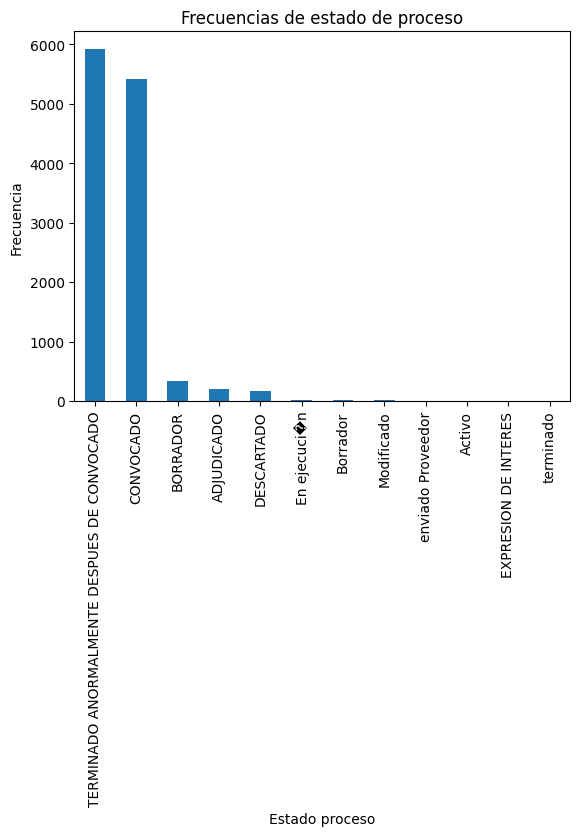

In [67]:
state_process = df_contract_0['estado_del_proceso'].value_counts()
state_process.plot(kind = 'bar')

#Agrega etiquetas y label al gráfico
plt.xlabel('Estado proceso')
plt.ylabel('Frecuencia')
plt.title('Frecuencias de estado de proceso')

Verificamos cuáles de los contratos con valor en 0 tiene fecha de firma informado.

In [68]:
date_val = df_contract_0['fecha_de_firma_del_contrato'].value_counts()
date_val

fecha_de_firma_del_contrato
03/04/2021    5
03/05/2021    4
12/06/2018    2
12/17/2020    2
02/23/2023    2
03/03/2021    2
11/22/2022    2
07/27/2021    2
01/13/2021    2
12/26/2022    2
08/16/2022    1
10/12/2022    1
10/25/2021    1
06/28/2023    1
01/08/2021    1
11/17/2021    1
08/11/2023    1
Name: count, dtype: int64

In [69]:
date_val.count()/df_contract_0.shape[0]

0.00140472649148901

Dado que no conocemos causales de fechas de contratación sin informar ni valores de contratos en 0, y nuestro objetivo es verificar datos historicos de contratación relacionados a montos y fechas etc., y tendríamos que contactar a dueños de datos para hacer estas validaciones, diremos que los datos válidos para nuestro análisis corresponden a registros que no tengan estas características

In [70]:
#Crea df sin valores de contrato en 0
df_final = df_temp[df_temp['valor_contrato'] != 0]
df_final.shape

(8297, 21)

In [71]:
#Valida cifra de de contratos sin fecha de firma
df_final['fecha_de_firma_del_contrato'].isnull().sum()

514

In [72]:
#Registros a trabajar
df_temp.shape[0] - df_contract_0.shape[0] - df_final['fecha_de_firma_del_contrato'].isnull().sum()

7783

In [73]:
#Omitimos registros sin fecha de firma de contrato
df_final = df_final[~df_final['fecha_de_firma_del_contrato'].isnull()]
df_final.shape

(7783, 21)

In [74]:
#Validacion de registro
df_final[df_final['numero_del_contrato'] == 'CO1.PCCNTR.972739']

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor


Para facilitar implementación de ejercicio se genera un campo con la estrutua YYYY-MM

In [75]:
#Estandarizacion de estructura de fecha A YYYY-MM-DD en caso de requerirlo.
#Tipos de estructura:
#   - YYYY-MM-DDT00:00:00.0000
#   - YYYY-MM-DD

df_final['fecha_de_firma_del_contrato'] = df_final['fecha_de_firma_del_contrato'].str.split('T').str.get(0)

In [76]:
df_final.dtypes

nivel_entidad                   object
nombre_de_la_entidad            object
nit_de_la_entidad               object
departamento_entidad            object
municipio_entidad               object
estado_del_proceso              object
modalidad_de_contrataci_n       object
objeto_a_contratar              object
objeto_del_proceso              object
tipo_de_contrato                object
fecha_de_firma_del_contrato     object
fecha_inicio_ejecucion          object
fecha_fin_ejecucion             object
tipo_contrato                   object
numero_del_contrato             object
numero_de_proceso               object
valor_contrato                 float64
nom_raz_social_contratista      object
url_contrato                    object
origen                          object
documento_proveedor             object
dtype: object

In [77]:
#Se extrae año
df_final['year_firma'] = df_final['fecha_de_firma_del_contrato'].str.split('/').str.get(2)
df_final.head(2)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,year_firma
0,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,02/27/2023,2023-02-28T00:00:00.000,2023-04-13T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4601233,CO1.BDOS.3974125,11424000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023
1,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,05/26/2023,2023-05-26T00:00:00.000,2023-05-26T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4888914,CO1.BDOS.4321521,8160000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023


In [78]:
#Se extrae mes
df_final['month_firma'] = df_final['fecha_de_firma_del_contrato'].str.split('/').str.get(0)

In [79]:
#Se genera campo a partir de la concatenación de año y mes
df_final['fecha_firma_yyyymm'] = df_final['year_firma'] + '-' + df_final['month_firma']

In [80]:
df_final.head(2)

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,year_firma,month_firma,fecha_firma_yyyymm
0,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,02/27/2023,2023-02-28T00:00:00.000,2023-04-13T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4601233,CO1.BDOS.3974125,11424000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023,02,2023-02
1,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,05/26/2023,2023-05-26T00:00:00.000,2023-05-26T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4888914,CO1.BDOS.4321521,8160000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023,05,2023-05


Enviamos a csv la data para procesar en proyecto

In [81]:
df_final.to_csv('data_processed.csv', index=False )

In [82]:
df_final.shape


(7783, 24)

In [83]:
val_date = df_final['fecha_firma_yyyymm'].value_counts()
val_date

fecha_firma_yyyymm
2018-12    226
2018-06    197
2018-05    188
2023-05    182
2018-11    181
          ... 
2016-08      4
2017-04      3
2016-11      2
2023-09      2
2016-09      1
Name: count, Length: 88, dtype: int64

Para conectar con ejercicio

In [84]:
#Conversion de campo a tipo fecha
df_final['fecha_firma_yyymm'] = pd.to_datetime(df_final['fecha_firma_yyyymm'])


In [85]:
#Filtro año
df_filt = df_final[df_final['year_firma'] == '2022']

In [86]:
#Se suma valor de contrato por fecha de firma
contract_value = df_filt.groupby('fecha_firma_yyymm')['valor_contrato'].sum()

Text(0, 0.5, 'Valores contrato')

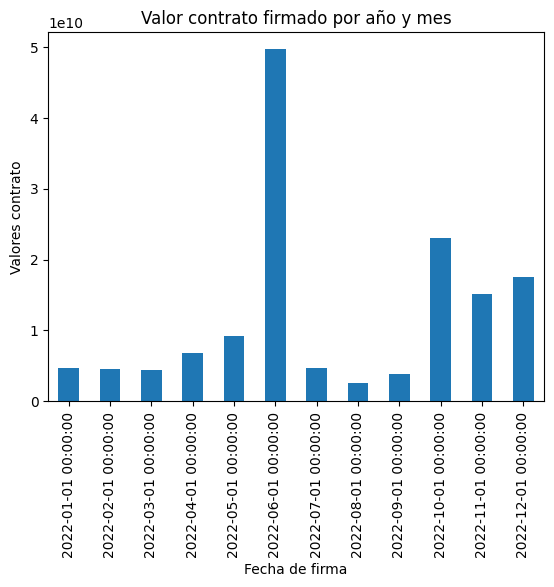

In [87]:
#Se grafica
contract_value.plot(kind ='bar')
plt.title('Valor contrato firmado por año y mes')
plt.xlabel('Fecha de firma')
plt.ylabel('Valores contrato')

In [88]:
df_final.dtypes

nivel_entidad                          object
nombre_de_la_entidad                   object
nit_de_la_entidad                      object
departamento_entidad                   object
municipio_entidad                      object
estado_del_proceso                     object
modalidad_de_contrataci_n              object
objeto_a_contratar                     object
objeto_del_proceso                     object
tipo_de_contrato                       object
fecha_de_firma_del_contrato            object
fecha_inicio_ejecucion                 object
fecha_fin_ejecucion                    object
tipo_contrato                          object
numero_del_contrato                    object
numero_de_proceso                      object
valor_contrato                        float64
nom_raz_social_contratista             object
url_contrato                           object
origen                                 object
documento_proveedor                    object
year_firma                        

# Lectura archivo - Valida nits

In [89]:
file_read = pd.read_csv('.\data_processed.csv', delimiter=',')
file_read
    

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,year_firma,month_firma,fecha_firma_yyyymm
0,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,02/27/2023,2023-02-28T00:00:00.000,2023-04-13T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4601233,CO1.BDOS.3974125,11424000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023,2,2023-02
1,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,05/26/2023,2023-05-26T00:00:00.000,2023-05-26T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4888914,CO1.BDOS.4321521,8160000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023,5,2023-05
2,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,828000309,Caquet�,Florencia,Activo,Contrataci�n directa,ARRENDAMIENTO DE UN ESPACIO F�SICO UBICADO EN ...,DAR EN ARRENDAMIENTO UN ESPACIO FISICO DISPUES...,Arrendamiento de inmuebles,06/26/2023,NaN,2023-12-31T00:00:00.000,Arrendamiento de inmuebles,CO1.PCCNTR.5139140,CO1.BDOS.4623658,3600000.0,CARLOS ALBERTO CAMPOS PEREZ,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1117518496,2023,6,2023-06
3,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,06/20/2023,2023-06-20T00:00:00.000,2023-07-06T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4977338,CO1.BDOS.4433951,16320000.0,oscasr fabian bolivar sachica,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79853341,2023,6,2023-06
4,No Definido,EPMSC ARMENIA INPEC,801000907,Quind�o,Armenia,cedido,M�nima cuant�a,SUMINISTRO DE CIGARRILLOS Y ENCENDEDORES CON D...,Suministro de cigarrillos y encendedores con d...,Suministros,05/03/2019,2019-05-02T00:00:00.000,2019-12-31T00:00:00.000,Suministros,CO1.PCCNTR.939537,CO1.BDOS.820344,47200000.0,PROVEER INSTITUCIONAL SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900365660,2019,5,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR GRUPO 1 SOSTENIMIENTO DE SEMOVIENTE...,CONTRATAR GRUPO 1 SOSTENIMIENTO DE SEMOVIENTE...,Suministros,08/04/2023,NaN,2023-12-15T00:00:00.000,Suministros,CO1.PCCNTR.4878802,CO1.BDOS.4282566,9757500.0,clinica veterinaria Dra Pets,https://community.secop.gov.co/Public/Tenderin...,SECOP II,63529406,2023,8,2023-08
7779,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,802008282,Atl�ntico,No Definido,Modificado,Contrataci�n directa,CONTRATAR EN ARRENDAMIENTO OFICINAS AMOBLADAS ...,CONTRATAR EN ARRENDAMIENTO OFICINAS AMOBLADAS ...,Arrendamiento de inmuebles,01/11/2023,2023-01-11T00:00:00.000,2023-12-31T00:00:00.000,Arrendamiento de inmuebles,CO1.PCCNTR.4389528,CO1.BDOS.3734152,315490131.0,VALDES FERNANDEZ CIA S EN CS SOCIEDAD CIVIL,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900771353,2023,1,2023-01
7780,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,824000857,Cesar,Aguachica,En ejecuci�n,M�nima cuant�a,CONTRATAR LA ADQUISICION DE EXTINTORES Y RECAR...,CONTRATAR LA ADQUISICION DE EXTINTORES Y RECAR...,Presta

In [90]:
#Se suma valor de contrato por fecha de firma
valida_nits = file_read.groupby(['nombre_de_la_entidad','nit_de_la_entidad'])['nit_de_la_entidad'].count()

In [91]:
type(valida_nits)

pandas.core.series.Series

In [92]:
len(valida_nits)

40

In [93]:
valida_nits

nombre_de_la_entidad                                                                                         nit_de_la_entidad
CARCEL Y PENITENCIARIA CON ALTA Y MEDIA SEGURIDAD DE LA DORADA CALDAS  INPEC                                 810006053             181
CARCEL Y PENITENCIARIA DE MEDIA SEGURIDAD DE BUCARAMANGA  INPEC                                              804003036             301
CARCEL Y PENITENCIERIA DE MEDIA SEGURIDAD DE CHIQUINQUIRA  INPEC                                             820000960             136
COBOGINPEC                                                                                                   830032532             372
DIRECCION REGIONAL ORIENTE  INPEC                                                                            804004840             127
EPMSC ARMENIA  INPEC                                                                                         801000907              66
ESCUELA DE FORMACION INPEC                                     

In [94]:
ver_nit = file_read[file_read['nit_de_la_entidad'] != 811010125]
ver_nit

,nivel_entidad,nombre_de_la_entidad,nit_de_la_entidad,departamento_entidad,municipio_entidad,estado_del_proceso,modalidad_de_contrataci_n,objeto_a_contratar,objeto_del_proceso,tipo_de_contrato,fecha_de_firma_del_contrato,fecha_inicio_ejecucion,fecha_fin_ejecucion,tipo_contrato,numero_del_contrato,numero_de_proceso,valor_contrato,nom_raz_social_contratista,url_contrato,origen,documento_proveedor,year_firma,month_firma,fecha_firma_yyyymm
0,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,02/27/2023,2023-02-28T00:00:00.000,2023-04-13T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4601233,CO1.BDOS.3974125,11424000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023,2,2023-02
1,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,05/26/2023,2023-05-26T00:00:00.000,2023-05-26T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4888914,CO1.BDOS.4321521,8160000.0,Wilson L,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79429405,2023,5,2023-05
2,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,828000309,Caquet�,Florencia,Activo,Contrataci�n directa,ARRENDAMIENTO DE UN ESPACIO F�SICO UBICADO EN ...,DAR EN ARRENDAMIENTO UN ESPACIO FISICO DISPUES...,Arrendamiento de inmuebles,06/26/2023,NaN,2023-12-31T00:00:00.000,Arrendamiento de inmuebles,CO1.PCCNTR.5139140,CO1.BDOS.4623658,3600000.0,CARLOS ALBERTO CAMPOS PEREZ,https://community.secop.gov.co/Public/Tenderin...,SECOP II,1117518496,2023,6,2023-06
3,No Definido,ESCUELA DE FORMACION INPEC,832001871,Cundinamarca,No Definido,En ejecuci�n,Contrataci�n directa,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,PRESTAR SERVICIOS PERSONALES PROFESIONALES COM...,Prestaci�n de servicios,06/20/2023,2023-06-20T00:00:00.000,2023-07-06T00:00:00.000,Prestaci�n de servicios,CO1.PCCNTR.4977338,CO1.BDOS.4433951,16320000.0,oscasr fabian bolivar sachica,https://community.secop.gov.co/Public/Tenderin...,SECOP II,79853341,2023,6,2023-06
4,No Definido,EPMSC ARMENIA INPEC,801000907,Quind�o,Armenia,cedido,M�nima cuant�a,SUMINISTRO DE CIGARRILLOS Y ENCENDEDORES CON D...,Suministro de cigarrillos y encendedores con d...,Suministros,05/03/2019,2019-05-02T00:00:00.000,2019-12-31T00:00:00.000,Suministros,CO1.PCCNTR.939537,CO1.BDOS.820344,47200000.0,PROVEER INSTITUCIONAL SAS,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900365660,2019,5,2019-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7778,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,844000729,Casanare,Yopal,Activo,M�nima cuant�a,CONTRATAR GRUPO 1 SOSTENIMIENTO DE SEMOVIENTE...,CONTRATAR GRUPO 1 SOSTENIMIENTO DE SEMOVIENTE...,Suministros,08/04/2023,NaN,2023-12-15T00:00:00.000,Suministros,CO1.PCCNTR.4878802,CO1.BDOS.4282566,9757500.0,clinica veterinaria Dra Pets,https://community.secop.gov.co/Public/Tenderin...,SECOP II,63529406,2023,8,2023-08
7779,No Definido,INSTITUTO NACIONAL PENITENCIARIO Y CARCELARIO ...,802008282,Atl�ntico,No Definido,Modificado,Contrataci�n directa,CONTRATAR EN ARRENDAMIENTO OFICINAS AMOBLADAS ...,CONTRATAR EN ARRENDAMIENTO OFICINAS AMOBLADAS ...,Arrendamiento de inmuebles,01/11/2023,2023-01-11T00:00:00.000,2023-12-31T00:00:00.000,Arrendamiento de inmuebles,CO1.PCCNTR.4389528,CO1.BDOS.3734152,315490131.0,VALDES FERNANDEZ CIA S EN CS SOCIEDAD CIVIL,https://community.secop.gov.co/Public/Tenderin...,SECOP II,900771353,2023,1,2023-01
7780,No Definido,ESTABLECIMIENTO PENITENCIARIO DE MEDIANA SEGUR...,824000857,Cesar,Aguachica,En ejecuci�n,M�nima cuant�a,CONTRATAR LA ADQUISICION DE EXTINTORES Y RECAR...,CONTRATAR LA ADQUISICION DE EXTINTORES Y RECAR...,Presta

In [95]:
ver_nit.shape

(7783, 24)